In [46]:
!pip install yfinance
!pip install pandas_datareader

import numpy as np 

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as data
 

In [47]:
start = '2010-01-01'
end  = '2019-12-31'

df = yf.download('AAPL'  , start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800


In [48]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800


In [49]:
df = df.drop(['Date', 'Adj Close'], axis = 1 )
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


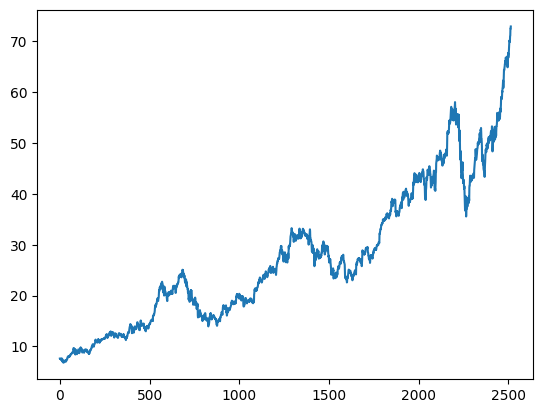

In [50]:
plt.plot(df.Close)

In [51]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [53]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

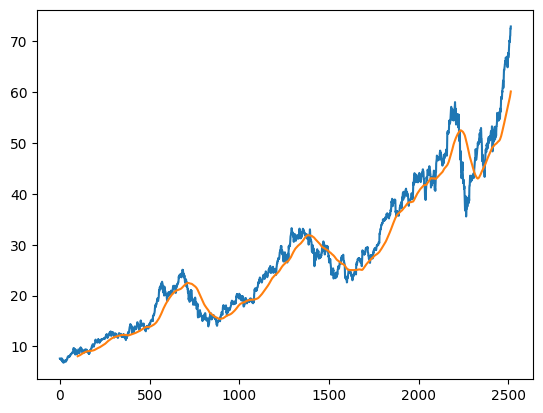

In [54]:
plt.figure(figure = (12, 6))
plt.plot(df.Close)
plt.plot(ma100)

In [60]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

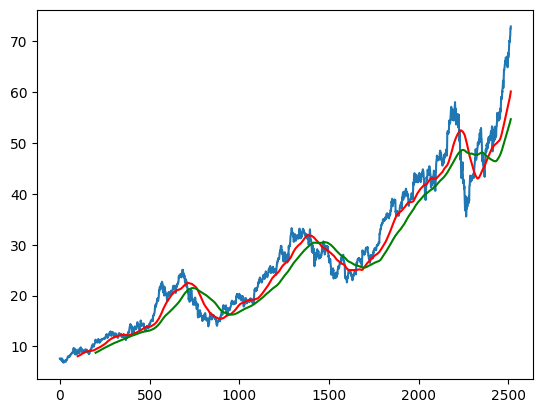

In [62]:
plt.figure(figure = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [63]:
df.shape

(2515, 5)

In [65]:
#Splitting the Data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [66]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [67]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
!pip install scikit-learn



In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [73]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [76]:
#splitting the data into x_train and y_train
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
        x_train.append(data_training_array[i-100 : i])
        y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train, y_train


(array([[[0.02971782],
         [0.03021854],
         [0.02560389],
         ...,
         [0.07403745],
         [0.07195343],
         [0.07045129]],
 
        [[0.03021854],
         [0.02560389],
         [0.02507608],
         ...,
         [0.07195343],
         [0.07045129],
         [0.08295551]],
 
        [[0.02560389],
         [0.02507608],
         [0.02697067],
         ...,
         [0.07045129],
         [0.08295551],
         [0.08773258]],
 
        ...,
 
        [[0.74224237],
         [0.74300022],
         [0.7582516 ],
         ...,
         [0.84795991],
         [0.84900194],
         [0.84170783]],
 
        [[0.74300022],
         [0.7582516 ],
         [0.76668248],
         ...,
         [0.84900194],
         [0.84170783],
         [0.84388656]],
 
        [[0.7582516 ],
         [0.76668248],
         [0.7708505 ],
         ...,
         [0.84170783],
         [0.84388656],
         [0.85089656]]]),
 array([0.08295551, 0.08773258, 0.093078  , ..., 0.8438

In [78]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [88]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1) ))
model.add(Dropout(0.2))


 

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1 ))

In [90]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - loss: 0.1245
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.0156
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0112
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 0.0085
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0099
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0103
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0089
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0089
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0082
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0076
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0070
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0061
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0064
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 0.0070
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - l

In [93]:
keras.saving.save_model(model, 'my_model.keras')

NameError: name 'keras' is not defined